# Hedwig: Sensor Inteligente para Casa Conectada

Neste tutorial, uma solução para aprendizado de atividade diária em ambiente de casa conectada é apresentado em 6 etapas:

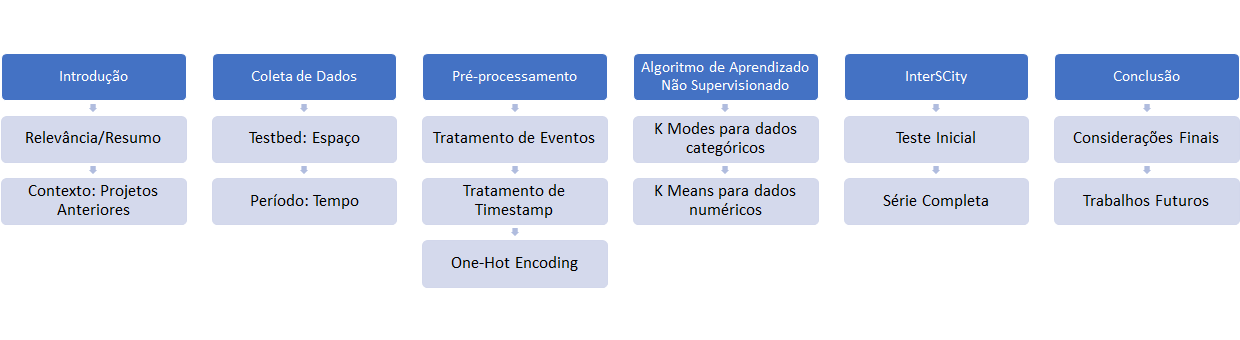

Na **introdução**, será apresentada a relevância e uma visão geral da solução.

A **coleta de dados** apresenta o contexto da infraestrutura de Internet das Coisas que permitiu a coleta de dados.

No **pré-processamento dos dados**, o filtro de eventos mais frequentes, obtenção de parâmetros a partir das séries temporais de eventos, e o one-hot endoding são apresentados.

Dois modelos de **algoritmos de aprendizado não-supervisionado** foram desenvolvidos: K Modes para processar diretamente dados categóricos, e K Means para processar os dados obtidos com o one-hot encoding.

Após a comparação entre os dois modelos, um deles foi escolhido para a rotulagem dos dados. Após um teste inicial com a API, os dados rotulados foram enviados para a plataforma **InterSCity**.

A última seção de **conclusão** apresenta as considerações finais e oportunidades de trabalhos futuros.

## 1. Introdução

Uma visão geral do projeto é descrita a partir de respostas a 6 perguntas.

Em especial, a última pergunta destaca a diferença entre este projeto e os projetos anteriores de casa conectada.

### 1.1. **Por que é relevante?**

Sensor inteligente para reconhecimento de atividade diária em uma casa conectada a partir de
dados de consumo energético, sensores de movimento e de estado da lâmpada. A capacidade
de reconhecer comportamento humano no ambiente residencial possui aplicações diversas:
monitoramento de idosos, autenticação continuada em local confiável, e informação
contextual para melhorar o engajamento de assistentes conversacionais.

### 1.2. Qual serão os dados de API ou interface que serão usados para troca de informações utilizando conceitos de IoT?

Serão utilizados dados disponíveis em medidor inteligente de energia, e módulos de automação residencial instalados em uma residência na região do ABC. Os dois tipos de módulos são baseados no ESP8266, e possuem autonomia de armazenamento de dados de um mês nos seus respectivos sistemas de arquivos. Vide exemplos de [dados de consumo energético coletados em trabalho anterior](https://github.com/vthayashi/OKIoT/tree/master/BoaEnergia), e [dados de estado de lâmpada e movimento na casa](https://github.com/vthayashi/OKIoT/tree/master/BrazilTestbed).

### 1.3. Descreva o que é entrada (sensores/dados) e o que é saída (dados/informações)

**Entrada**: dados de um mês (17/09 a 17/10) de 10 sensores de movimento PIR, 10 sensores de estado da lâmpada, e 8 sensores de corrente não-invasivo (consumo total e 4 setores) armazenados em módulos instalados em uma casa conectada.

**Saída**: atividade diária atual no InterSCity para consumo por outras aplicações de computação em nuvem (alertas em aplicações mobile, monitoramento de médio e longo prazo
de comportamento)

### 1.4. Descreva o filtro que será aplicado nos dados, pois o dado de entrada não deve ser igual à informação da saída

Será aplicado o algoritmo de aprendizado não-supervisionado K-means para aprendizado de atividades diárias. Os hiperparâmetros considerados serão relacionados à localização do evento e aspecto temporal do evento, como ambiente/setor (sala, cozinha, quarto, chuveiro, etc), dia da semana, período do dia e hora.

### 1.5. Descreva como será a comunicação. Se será por meio de alguma API ou outra tecnologia

Os dados disponíveis nos módulos instalados em residência da região do ABC serão coletados a partir de requests HTTP, armazenados no GitHub para facilitar a replicação do experimento. Um notebook no ambiente cloud Google Colab será desenvolvido para coletar os dados do Google Drive, executar os algoritmos de aprendizado não-supervisionado, e obter a atividade diária correspondente a um determinado instante. Esta informação será publicada no InterSCity, onde outras aplicações podem consumir a informação.

### 1.6. **Diferença entre projetos anteriores e este**

Nos projetos anteriores, implementei módulos de automação residencial com ESP8266, e módulo coletor de dados baseado no sistema de arquivos do ESP8266, com instalação de 10 módulos com sensores PIR e de estado da iluminação principal com comunicação RF 433 MHz para um módulo coletor de dados (autonomia de armazenamento de dados de um mês) em uma residência na região do ABC.

Em trabalho anterior, já fiz predição de eventos reais com LSTM e classificação de pessoa na residência (algoritmo de aprendizado supervisionado Random Forest) com dados sintéticos de modelo de redes de Petri coloridas.

Neste projeto, irei explorar algoritmo de aprendizado não-supervisionado para outro cenário (aprendizado de atividades cotidianas), com dados mais atuais (22 de setembro de 2020 a 21 de outubro de 2020) coletados usando a infraestrutura de projetos anteriores.

**Referências**:

HAYASHI, Victor Takashi et al. OKIoT Open Knowledge IoT Project: Smart Home Case Studies of Short-term Course and Software Residency Capstone Project. In: **IoTBDS**. 2020. p. 235-242. [Scitepress](https://www.scitepress.org/Link.aspx?doi=10.5220/0009366002350242)

HAYASHI, Victor T.; ARAKAKI, Reginaldo; RUGGIERO, Wilson V. OKIoT: Trade Off Analysis of Smart Speaker Architecture on Open Knowledge IoT Project. **Internet of Things**, p. 100310, 2020. [Science Direct](https://www.sciencedirect.com/science/article/pii/S2542660520301414)

## 2. Coleta de Dados

Seção de contextualização a partir dos projetos anteriores.

### 2.1. Testbed

**Módulo OKIoT Datalogger** desenvolvido em trabalho anterior, e instalado em residência na região do ABC, disponível no [GitHub](https://github.com/vthayashi/OKIoT/tree/master/Datalogger).

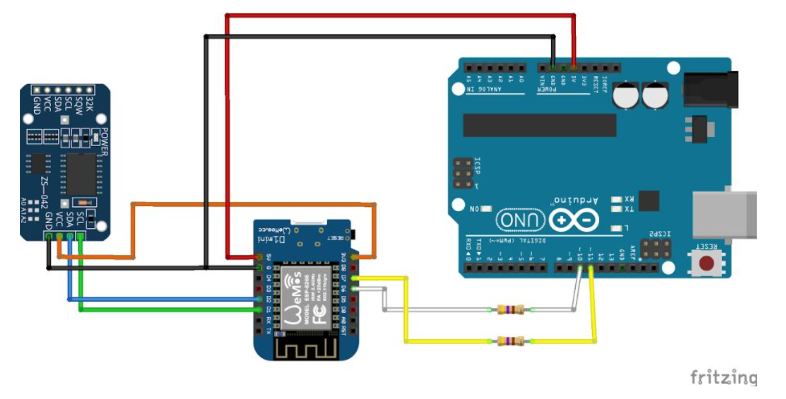

**10 Módulos com sensores de movimento e estado da iluminação principal** com comunicação sem fio RF 433 MHz instalados em residência na região do ABC. Maiores detelhes em [outro repositório do GitHub](https://github.com/vthayashi/OKIoT/tree/master/BrazilTestbed).

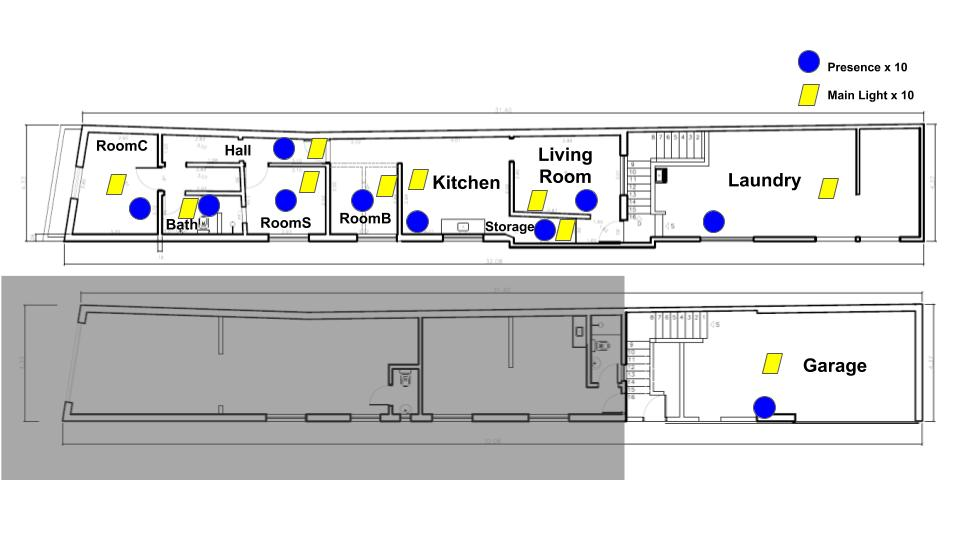

**Referência**:

HAYASHI, Victor T.; RUGGIERO, Wilson V. Non-Invasive Challenge Response Authentication for Voice Transactions with Smart Home Behavior. **Sensors**, 20(22):6563, 2020. [MDPI](https://www.mdpi.com/1424-8220/20/22/6563)

### 2.2. Fotos dos Sensores

Fotos dos módulos IoT instalados para automação residencial e coleta de dados.

Maiores detalhes na monografia: https://github.com/hedwig-project

Preparação dos modulos com ESP8266 Wemos D1 mini (2017):

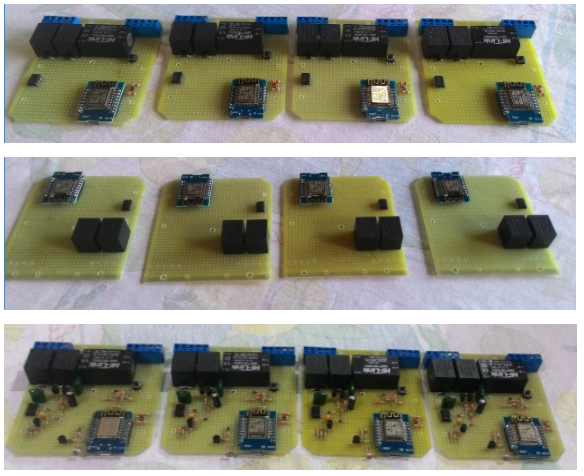

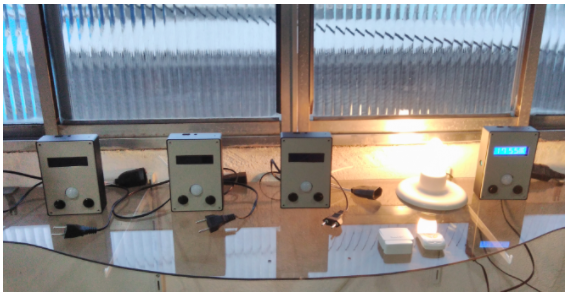

Módulos instalados na residência e interface web de controle, monitoramento e configuração de regras de automação (funcionalidades de manter ligado a partir de sensores de movimento PIR, ou sensor de abertura com comunicação de radio frequência 433 MHz):

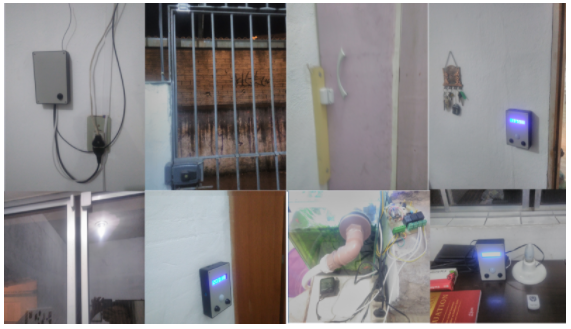

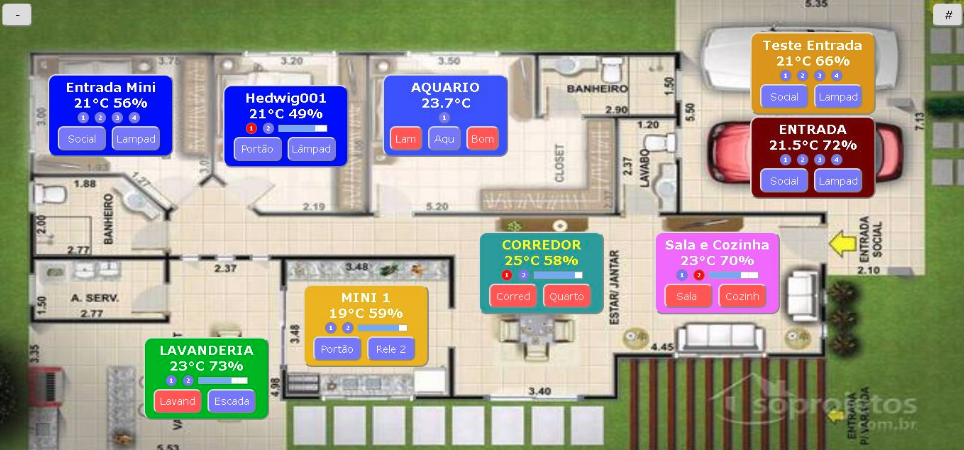

OBS.: nestas fotos de 2017, haviam apenas 9 módulos. Em 2018-2020 mais módulos foram adicionados e os existentes foram atualizados, até a situação de 20 sensores (2 em cada módulo) destacada na planta fo test bed.

OBS2.: a planta da interface web é meramente ilustrativa.

### 2.3. Dados Coletados

Dados novos coletados usando a infraestrutura anterior:

**Dados de 22 de setembro de 2020 a 21 de outubro de 2020** coletados em uma casa da região do ABC disponibilizados no [GitHub](https://github.com/vthayashi/smarthome/tree/main/datalogger).

In [ ]:
import pandas as pd

def github_txt2pd_df(file):

  url = 'http://raw.githubusercontent.com/vthayashi/smarthome/main/datalogger-labeled/'

  df = pd.read_csv(url+file, sep=" ", header=None, names = ['unix_ts','room','event','state'], error_bad_lines=False)

  return df

Fazemos o teste inicial com a leitura de apenas um arquivo do formato txt a partir do github, e salvamos os dados em uma estrutura de dados do tipo dataframe da biblioteca pandas.

In [ ]:
df = github_txt2pd_df('200922.txt')

df

unix_ts      room event state
0     1600732834    Lavand   Som    ON
1     1600732995    Lavand   Som   OFF
2     1600733002    Lavand  Lamp   OFF
3     1600733049      Sala    TV    ON
4     1600733323    Lavand   PIR   OFF
...          ...       ...   ...   ...
1376  1600818523     Banho  Lamp   OFF
1377  1600818560    Lavand  Lamp    ON
1378  1600818561    Lavand   PIR    ON
1379  1600818932    Lavand  Lamp   OFF
1380  1600819050  Corredor  Lamp   OFF

[1381 rows x 4 columns]

In [ ]:
def files2df(df, filelist):
  for file in filelist:
    print(file)
    
    df2 = github_txt2pd_df(file)
    df2

    df = pd.concat([df, df2])

  return df

Com a função definida acima, podemos obter os dados a partir de uma lista de arquivos, e salvar tudo em um mesmo dataframe:

In [ ]:
filelist = ['200923.txt','200924.txt','200925.txt','200926.txt','200927.txt', \
         '200928.txt','200929.txt','200930.txt', \
         '201001.txt','201002.txt','201003.txt','201004.txt','201005.txt', \
         '201006.txt','201007.txt','201008.txt', \
         '201009.txt','201010.txt','201011.txt','201012.txt','201013.txt', \
         '201014.txt','201015.txt','201016.txt', \
         '201017.txt','201018.txt','201019.txt','201020.txt','201021.txt']

df_all = files2df(df,filelist)

df = df_all

df

200923.txt
200924.txt
200925.txt
200926.txt
200927.txt
200928.txt
200929.txt
200930.txt
201001.txt
201002.txt
201003.txt
201004.txt
201005.txt
201006.txt
201007.txt
201008.txt
201009.txt
201010.txt
201011.txt
201012.txt
201013.txt
201014.txt
201015.txt
201016.txt
201017.txt
201018.txt
201019.txt
201020.txt
201021.txt


unix_ts         room                event state
0    1600732834       Lavand                  Som    ON
1    1600732995       Lavand                  Som   OFF
2    1600733002       Lavand                 Lamp   OFF
3    1600733049         Sala                   TV    ON
4    1600733323       Lavand                  PIR   OFF
..          ...          ...                  ...   ...
801  1603324714      QuaSabr                  PIR    ON
802  1603324727         Sala                  PIR    ON
803  1603324732       QuaVic                  PIR    ON
804  1603324771         Ver:  DataLogger4_191103a   NaN
805  1603324788  wifiErrCnt:                    1   NaN

[27117 rows x 4 columns]

Podemos observar que temos mais de 27 mil eventos coletados.

## 3. Pré-processamento

Nesta seção, iremos filtrar os eventos mais frequentes, e obter alguns parâmetros de interesse a partir do carimbo de tempo dos eventos.

### 3.1. Tratamento de Eventos

Começamos obtendo uma visão geral do dataframe.

In [ ]:
import numpy as np

In [ ]:
df.describe(exclude=[np.number])

room  event  state
count   27117  27078  21025
unique     20   1814      2
top      RFRX    PIR     ON
freq     5236  15565  10674

In [ ]:
df.head()

unix_ts    room event state
0  1600732834  Lavand   Som    ON
1  1600732995  Lavand   Som   OFF
2  1600733002  Lavand  Lamp   OFF
3  1600733049    Sala    TV    ON
4  1600733323  Lavand   PIR   OFF

Obtemos uma coluna de evento com descrição completa a partir de outras colunas já existentes no dataframe:

In [ ]:
df["full_event"] = df["room"]+df["event"]+df["state"]

df

unix_ts         room                event state     full_event
0    1600732834       Lavand                  Som    ON    LavandSomON
1    1600732995       Lavand                  Som   OFF   LavandSomOFF
2    1600733002       Lavand                 Lamp   OFF  LavandLampOFF
3    1600733049         Sala                   TV    ON       SalaTVON
4    1600733323       Lavand                  PIR   OFF   LavandPIROFF
..          ...          ...                  ...   ...            ...
801  1603324714      QuaSabr                  PIR    ON   QuaSabrPIRON
802  1603324727         Sala                  PIR    ON      SalaPIRON
803  1603324732       QuaVic                  PIR    ON    QuaVicPIRON
804  1603324771         Ver:  DataLogger4_191103a   NaN            NaN
805  1603324788  wifiErrCnt:                    1   NaN            NaN

[27117 rows x 5 columns]

Filtramos os eventos que não tem relação com dados dos sensores, como logs de instabilidade de conexão por exemplo:

In [ ]:
df = df.dropna()

df = df.drop(columns=['state'])

df

unix_ts     room event     full_event
0    1600732834   Lavand   Som    LavandSomON
1    1600732995   Lavand   Som   LavandSomOFF
2    1600733002   Lavand  Lamp  LavandLampOFF
3    1600733049     Sala    TV       SalaTVON
4    1600733323   Lavand   PIR   LavandPIROFF
..          ...      ...   ...            ...
798  1603324601   Lavand   PIR   LavandPIROFF
800  1603324656     Sala   PIR     SalaPIROFF
801  1603324714  QuaSabr   PIR   QuaSabrPIRON
802  1603324727     Sala   PIR      SalaPIRON
803  1603324732   QuaVic   PIR    QuaVicPIRON

[21025 rows x 4 columns]

Desta forma, de 27 mil eventos, obtemos cerca de 21 mil eventos válidos.

Obtemos a visão geral dos dados novamente, em forma tabular e gráfica.

In [ ]:
df.describe(exclude=[np.number])

room  event full_event
count   21025  21025      21025
unique     11      8         52
top      Sala    PIR  SalaPIRON
freq     3855  15565       1683

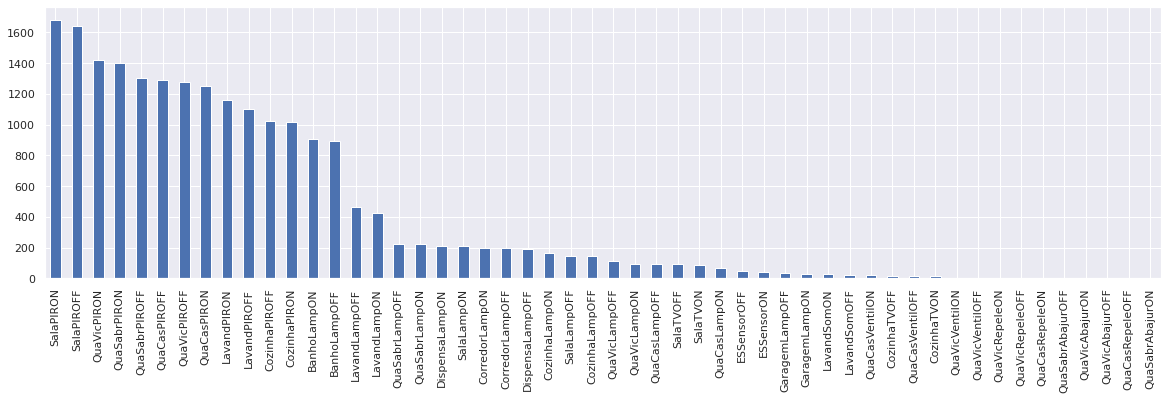

In [ ]:
df['full_event'].value_counts().plot(kind='bar', figsize=(20, 5))

Realizamos o filtro de eventos mais frequentes para facilitar o aprendizado não supervisionado em seguida.

São considerados eventos frequentes aqueles com contagem maior que 800 na série de 30 dias de dados.

In [ ]:
counts = df['full_event'].value_counts()

remove_list = counts[counts <= 800].index

remove_list

Index(['LavandLampOFF', 'LavandLampON', 'QuaSabrLampOFF', 'QuaSabrLampON',
       'DispensaLampON', 'SalaLampON', 'CorredorLampON', 'CorredorLampOFF',
       'DispensaLampOFF', 'CozinhaLampON', 'SalaLampOFF', 'CozinhaLampOFF',
       'QuaVicLampOFF', 'QuaVicLampON', 'QuaCasLampOFF', 'SalaTVOFF',
       'SalaTVON', 'QuaCasLampON', 'ESSensorOFF', 'ESSensorON',
       'GaragemLampOFF', 'GaragemLampON', 'LavandSomON', 'LavandSomOFF',
       'QuaCasVentilON', 'CozinhaTVOFF', 'QuaCasVentilOFF', 'CozinhaTVON',
       'QuaVicVentilON', 'QuaVicVentilOFF', 'QuaVicRepeleON',
       'QuaVicRepeleOFF', 'QuaCasRepeleON', 'QuaSabrAbajurOFF',
       'QuaVicAbajurON', 'QuaVicAbajurOFF', 'QuaCasRepeleOFF',
       'QuaSabrAbajurON'],
      dtype='object')

In [ ]:
df.replace(remove_list, np.nan, inplace = True)

df

unix_ts     room event    full_event
0    1600732834   Lavand   Som           NaN
1    1600732995   Lavand   Som           NaN
2    1600733002   Lavand  Lamp           NaN
3    1600733049     Sala    TV           NaN
4    1600733323   Lavand   PIR  LavandPIROFF
..          ...      ...   ...           ...
798  1603324601   Lavand   PIR  LavandPIROFF
800  1603324656     Sala   PIR    SalaPIROFF
801  1603324714  QuaSabr   PIR  QuaSabrPIRON
802  1603324727     Sala   PIR     SalaPIRON
803  1603324732   QuaVic   PIR   QuaVicPIRON

[21025 rows x 4 columns]

In [ ]:
df = df.dropna()

df

unix_ts     room event    full_event
4    1600733323   Lavand   PIR  LavandPIROFF
5    1600733447     Sala   PIR    SalaPIROFF
6    1600733941     Sala   PIR     SalaPIRON
7    1600734243     Sala   PIR    SalaPIROFF
8    1600735100     Sala   PIR     SalaPIRON
..          ...      ...   ...           ...
798  1603324601   Lavand   PIR  LavandPIROFF
800  1603324656     Sala   PIR    SalaPIROFF
801  1603324714  QuaSabr   PIR  QuaSabrPIRON
802  1603324727     Sala   PIR     SalaPIRON
803  1603324732   QuaVic   PIR   QuaVicPIRON

[17364 rows x 4 columns]

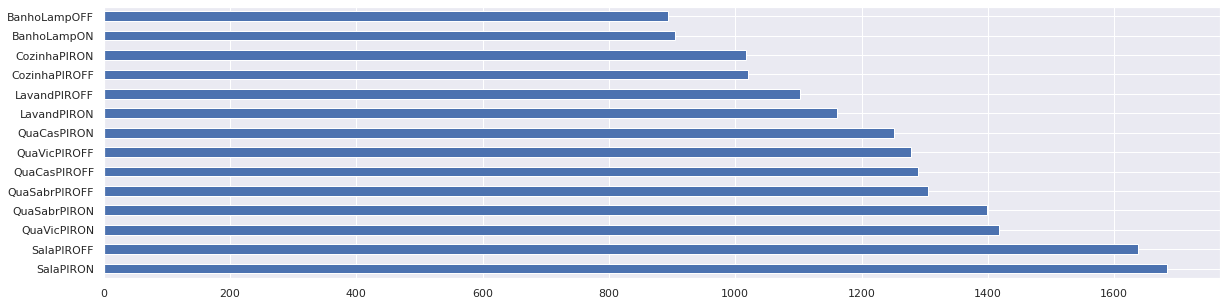

In [ ]:
df['full_event'].value_counts().plot(kind='barh', figsize=(20, 5))

Desta forma, de 21 mil eventos válidos, obtemos cerca de 17 mil eventos mais frequentes.

### 3.2. Tratamento de Timestamp

Agora que tratamos os eventos, iremos obter parâmetros de interesse a partir dos carimbos de tempo presentes no dataframe.

In [ ]:
df.head()

unix_ts    room event    full_event
4  1600733323  Lavand   PIR  LavandPIROFF
5  1600733447    Sala   PIR    SalaPIROFF
6  1600733941    Sala   PIR     SalaPIRON
7  1600734243    Sala   PIR    SalaPIROFF
8  1600735100    Sala   PIR     SalaPIRON

Conversão de unix timestamp para o formato datetime do Python:

In [ ]:
df['date'] = pd.to_datetime(df['unix_ts'],unit='s')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Obtenção de parâmetro de dia da semana:

In [ ]:
df['weekDay'] = df['date'].dt.day_name()

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


unix_ts     room event    full_event                date    weekDay
4    1600733323   Lavand   PIR  LavandPIROFF 2020-09-22 00:08:43    Tuesday
5    1600733447     Sala   PIR    SalaPIROFF 2020-09-22 00:10:47    Tuesday
6    1600733941     Sala   PIR     SalaPIRON 2020-09-22 00:19:01    Tuesday
7    1600734243     Sala   PIR    SalaPIROFF 2020-09-22 00:24:03    Tuesday
8    1600735100     Sala   PIR     SalaPIRON 2020-09-22 00:38:20    Tuesday
..          ...      ...   ...           ...                 ...        ...
798  1603324601   Lavand   PIR  LavandPIROFF 2020-10-21 23:56:41  Wednesday
800  1603324656     Sala   PIR    SalaPIROFF 2020-10-21 23:57:36  Wednesday
801  1603324714  QuaSabr   PIR  QuaSabrPIRON 2020-10-21 23:58:34  Wednesday
802  1603324727     Sala   PIR     SalaPIRON 2020-10-21 23:58:47  Wednesday
803  1603324732   QuaVic   PIR   QuaVicPIRON 2020-10-21 23:58:52  Wednesday

[17364 rows x 6 columns]

Obtenção de parâmetro de hora do evento:

In [ ]:
df['hour'] = df['date'].dt.hour

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


unix_ts     room event  ...                date    weekDay hour
4    1600733323   Lavand   PIR  ... 2020-09-22 00:08:43    Tuesday    0
5    1600733447     Sala   PIR  ... 2020-09-22 00:10:47    Tuesday    0
6    1600733941     Sala   PIR  ... 2020-09-22 00:19:01    Tuesday    0
7    1600734243     Sala   PIR  ... 2020-09-22 00:24:03    Tuesday    0
8    1600735100     Sala   PIR  ... 2020-09-22 00:38:20    Tuesday    0
..          ...      ...   ...  ...                 ...        ...  ...
798  1603324601   Lavand   PIR  ... 2020-10-21 23:56:41  Wednesday   23
800  1603324656     Sala   PIR  ... 2020-10-21 23:57:36  Wednesday   23
801  1603324714  QuaSabr   PIR  ... 2020-10-21 23:58:34  Wednesday   23
802  1603324727     Sala   PIR  ... 2020-10-21 23:58:47  Wednesday   23
803  1603324732   QuaVic   PIR  ... 2020-10-21 23:58:52  Wednesday   23

[17364 rows x 7 columns]

Obtenção de período do dia:

In [ ]:
#https://stackoverflow.com/questions/55571311/get-part-of-day-morning-afternoon-evening-night-in-python-dataframe

def f(x):
    if (x > 4) and (x <= 8):
        return 'EarlyMorning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'LateNight'

In [ ]:
df['dayPeriod'] = df['hour'].apply(f)

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


unix_ts     room event  ...    weekDay hour  dayPeriod
4    1600733323   Lavand   PIR  ...    Tuesday    0  LateNight
5    1600733447     Sala   PIR  ...    Tuesday    0  LateNight
6    1600733941     Sala   PIR  ...    Tuesday    0  LateNight
7    1600734243     Sala   PIR  ...    Tuesday    0  LateNight
8    1600735100     Sala   PIR  ...    Tuesday    0  LateNight
..          ...      ...   ...  ...        ...  ...        ...
798  1603324601   Lavand   PIR  ...  Wednesday   23      Night
800  1603324656     Sala   PIR  ...  Wednesday   23      Night
801  1603324714  QuaSabr   PIR  ...  Wednesday   23      Night
802  1603324727     Sala   PIR  ...  Wednesday   23      Night
803  1603324732   QuaVic   PIR  ...  Wednesday   23      Night

[17364 rows x 8 columns]

Exclusão da coluna adicional de carimbo de tempo com formato datetime:

In [ ]:
df = df.drop(columns=['date'])

df

unix_ts     room event    full_event    weekDay  hour  dayPeriod
4    1600733323   Lavand   PIR  LavandPIROFF    Tuesday     0  LateNight
5    1600733447     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight
6    1600733941     Sala   PIR     SalaPIRON    Tuesday     0  LateNight
7    1600734243     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight
8    1600735100     Sala   PIR     SalaPIRON    Tuesday     0  LateNight
..          ...      ...   ...           ...        ...   ...        ...
798  1603324601   Lavand   PIR  LavandPIROFF  Wednesday    23      Night
800  1603324656     Sala   PIR    SalaPIROFF  Wednesday    23      Night
801  1603324714  QuaSabr   PIR  QuaSabrPIRON  Wednesday    23      Night
802  1603324727     Sala   PIR     SalaPIRON  Wednesday    23      Night
803  1603324732   QuaVic   PIR   QuaVicPIRON  Wednesday    23      Night

[17364 rows x 7 columns]

Visão geral a partir do agrupamento dos dados por dia da semana, e período do dia:

In [ ]:
grouped = df.groupby(['weekDay', 'dayPeriod'])[['full_event']].count()

grouped

full_event
weekDay   dayPeriod               
Friday    EarlyMorning         319
          Eve                  398
          LateNight            439
          Morning              530
          Night                284
          Noon                 401
Monday    EarlyMorning         407
          Eve                  306
          LateNight            442
          Morning              533
          Night                292
          Noon                 429
Saturday  EarlyMorning         293
          Eve                  421
          LateNight            438
          Morning              443
          Night                266
          Noon                 383
Sunday    EarlyMorning         350
          Eve                  293
          LateNight            504
          Morning              518
          Night                241
          Noon                 384
Thursday  EarlyMorning         362
          Eve                  331
          LateNight            453
          Morning              492
          Night                226
          Noon                 362
Tuesday   EarlyMorning         497
          Eve                  440
          LateNight            594
          Morning              572
          Night                356
          Noon                 447
Wednesday EarlyMorning         435
          Eve                  471
          LateNight            599
          Morning              606
          Night                320
          Noon                 487

### 3.3. One-Hot Encoding

Nesta seção, aplicamos o One-hot encoding para preparar um dataframe que o algoritmo de aprendizado não-supervisionado K Means possa ser adotado em seção posterior.

In [ ]:
df

unix_ts     room event    full_event    weekDay  hour  dayPeriod
4    1600733323   Lavand   PIR  LavandPIROFF    Tuesday     0  LateNight
5    1600733447     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight
6    1600733941     Sala   PIR     SalaPIRON    Tuesday     0  LateNight
7    1600734243     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight
8    1600735100     Sala   PIR     SalaPIRON    Tuesday     0  LateNight
..          ...      ...   ...           ...        ...   ...        ...
798  1603324601   Lavand   PIR  LavandPIROFF  Wednesday    23      Night
800  1603324656     Sala   PIR    SalaPIROFF  Wednesday    23      Night
801  1603324714  QuaSabr   PIR  QuaSabrPIRON  Wednesday    23      Night
802  1603324727     Sala   PIR     SalaPIRON  Wednesday    23      Night
803  1603324732   QuaVic   PIR   QuaVicPIRON  Wednesday    23      Night

[17364 rows x 7 columns]

One-hot encoding com a varíavel de evento completo:

In [ ]:
onehotdf_evt = pd.get_dummies(df['full_event'], prefix='evt')

onehotdf_evt

evt_BanhoLampOFF  evt_BanhoLampON  ...  evt_SalaPIROFF  evt_SalaPIRON
4                   0                0  ...               0              0
5                   0                0  ...               1              0
6                   0                0  ...               0              1
7                   0                0  ...               1              0
8                   0                0  ...               0              1
..                ...              ...  ...             ...            ...
798                 0                0  ...               0              0
800                 0                0  ...               1              0
801                 0                0  ...               0              0
802                 0                0  ...               0              1
803                 0                0  ...               0              0

[17364 rows x 14 columns]

One-hot encoding com a variável de dia da semana:

In [ ]:
onehotdf_weekday = pd.get_dummies(df['weekDay'], prefix='wkday')

onehotdf_weekday

wkday_Friday  wkday_Monday  ...  wkday_Tuesday  wkday_Wednesday
4               0             0  ...              1                0
5               0             0  ...              1                0
6               0             0  ...              1                0
7               0             0  ...              1                0
8               0             0  ...              1                0
..            ...           ...  ...            ...              ...
798             0             0  ...              0                1
800             0             0  ...              0                1
801             0             0  ...              0                1
802             0             0  ...              0                1
803             0             0  ...              0                1

[17364 rows x 7 columns]

In [ ]:
onehotdf_dayPeriod = pd.get_dummies(df['dayPeriod'], prefix='dayprd')

onehotdf_dayPeriod

dayprd_EarlyMorning  dayprd_Eve  ...  dayprd_Night  dayprd_Noon
4                      0           0  ...             0            0
5                      0           0  ...             0            0
6                      0           0  ...             0            0
7                      0           0  ...             0            0
8                      0           0  ...             0            0
..                   ...         ...  ...           ...          ...
798                    0           0  ...             1            0
800                    0           0  ...             1            0
801                    0           0  ...             1            0
802                    0           0  ...             1            0
803                    0           0  ...             1            0

[17364 rows x 6 columns]

In [ ]:
df_onehot = pd.concat([onehotdf_evt, onehotdf_weekday, onehotdf_dayPeriod], axis = 1, join = 'inner')

df_onehot

evt_BanhoLampOFF  evt_BanhoLampON  ...  dayprd_Night  dayprd_Noon
4                   0                0  ...             0            0
5                   0                0  ...             0            0
6                   0                0  ...             0            0
7                   0                0  ...             0            0
8                   0                0  ...             0            0
..                ...              ...  ...           ...          ...
798                 0                0  ...             1            0
800                 0                0  ...             1            0
801                 0                0  ...             1            0
802                 0                0  ...             1            0
803                 0                0  ...             1            0

[17364 rows x 27 columns]

Neste momento, temos um dataframe (df) com veriáveis categóricas, e outro dataframe com variáveis numéricas (df_onehot).

## 4. Algoritmo de Aprendizado Não-supervisionado

Nesta seção, são aplicados dois algoritmos para agrupamento dos dados de eventos.

### 4.1. K Modes

O algoritmo K Modes é usado para agrupamento de variáveis categóricas.

**Referência**:

HUANG, Zhexue; NG, Michael K. A fuzzy k-modes algorithm for clustering categorical data. **IEEE transactions on Fuzzy Systems**, v. 7, n. 4, p. 446-452, 1999.

A biblioteca usada está disponível no GitHub.

**Referência**:

VOS, Nelis J. kmodes categorical clustering library. Disponível em: https://github.com/nicodv/kmodes. Acesso em 18 de novembro de 2020.

In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
from kmodes.kmodes import KModes

Utilizamos apenas os parâmetros de ambiente em que o evento ocorreu, e o período do dia:

In [ ]:
df2 = df.drop(columns=['unix_ts','hour','weekDay','full_event','event'])

df2

room  dayPeriod
4     Lavand  LateNight
5       Sala  LateNight
6       Sala  LateNight
7       Sala  LateNight
8       Sala  LateNight
..       ...        ...
798   Lavand      Night
800     Sala      Night
801  QuaSabr      Night
802     Sala      Night
803   QuaVic      Night

[17364 rows x 2 columns]

Consideramos apenas 10 clusters por simplicidade:

In [ ]:
km = KModes(n_clusters=10, init='Huang', n_init=10, verbose=0)

clusters = km.fit_predict(df2)
centroids = km.cluster_centroids_
km_df = pd.DataFrame(centroids)

print(' ')
print(centroids)
df['kmode'] = km.labels_

 
[['QuaCas' 'EarlyMorning']
 ['Lavand' 'Morning']
 ['Sala' 'Eve']
 ['Lavand' 'Eve']
 ['QuaSabr' 'Morning']
 ['Banho' 'LateNight']
 ['Sala' 'Noon']
 ['Lavand' 'Noon']
 ['QuaCas' 'Noon']
 ['Sala' 'Night']]


O resultado da rotulagem com o modelo K Modes está agregado ao dataframe: 

In [ ]:
df

unix_ts     room event    full_event    weekDay  hour  dayPeriod  kmode
4    1600733323   Lavand   PIR  LavandPIROFF    Tuesday     0  LateNight      1
5    1600733447     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight      2
6    1600733941     Sala   PIR     SalaPIRON    Tuesday     0  LateNight      2
7    1600734243     Sala   PIR    SalaPIROFF    Tuesday     0  LateNight      2
8    1600735100     Sala   PIR     SalaPIRON    Tuesday     0  LateNight      2
..          ...      ...   ...           ...        ...   ...        ...    ...
798  1603324601   Lavand   PIR  LavandPIROFF  Wednesday    23      Night      1
800  1603324656     Sala   PIR    SalaPIROFF  Wednesday    23      Night      9
801  1603324714  QuaSabr   PIR  QuaSabrPIRON  Wednesday    23      Night      4
802  1603324727     Sala   PIR     SalaPIRON  Wednesday    23      Night      9
803  1603324732   QuaVic   PIR   QuaVicPIRON  Wednesday    23      Night      9

[17364 rows x 8 columns]

### 4.2. K Means

O segundo algoritmo de clusterização é o K Means, de 1967.

Para mais detalhes: https://github.com/vthayashi/curso-fiot/blob/patch-2/5-tratamentodedados/opcoes/k-means.md

**Referência**:

MACQUEEN, James et al. Some methods for classification and analysis of multivariate observations. In: **Proceedings of the fifth Berkeley symposium on mathematical statistics and probability**. 1967. p. 281-297.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

Utilizamos variáveis numéricas do dataframe obtido com o one-hot encoding:

In [ ]:
df_onehot

evt_BanhoLampOFF  evt_BanhoLampON  ...  dayprd_Night  dayprd_Noon
4                   0                0  ...             0            0
5                   0                0  ...             0            0
6                   0                0  ...             0            0
7                   0                0  ...             0            0
8                   0                0  ...             0            0
..                ...              ...  ...           ...          ...
798                 0                0  ...             1            0
800                 0                0  ...             1            0
801                 0                0  ...             1            0
802                 0                0  ...             1            0
803                 0                0  ...             1            0

[17364 rows x 27 columns]

Também consideramos 10 clusters por simplicidade:

In [ ]:
kmeans = KMeans(n_clusters=10).fit(df_onehot)

df['kmean'] = kmeans.labels_
#df['kmean'].value_counts()

In [ ]:
df

unix_ts     room event  ... kmode                date  kmean
4    1600733323   Lavand   PIR  ...     1 2020-09-22 00:08:43      9
5    1600733447     Sala   PIR  ...     2 2020-09-22 00:10:47      9
6    1600733941     Sala   PIR  ...     2 2020-09-22 00:19:01      9
7    1600734243     Sala   PIR  ...     2 2020-09-22 00:24:03      9
8    1600735100     Sala   PIR  ...     2 2020-09-22 00:38:20      9
..          ...      ...   ...  ...   ...                 ...    ...
798  1603324601   Lavand   PIR  ...     1 2020-10-21 23:56:41      5
800  1603324656     Sala   PIR  ...     9 2020-10-21 23:57:36      5
801  1603324714  QuaSabr   PIR  ...     4 2020-10-21 23:58:34      5
802  1603324727     Sala   PIR  ...     9 2020-10-21 23:58:47      5
803  1603324732   QuaVic   PIR  ...     9 2020-10-21 23:58:52      5

[17364 rows x 10 columns]

### 4.3. Comparação entre K Modes e K Means

Definição de Função de visualização de contagem de eventos nos clusters para uma análise qualitativa:

In [ ]:
def cluster(i,column):
  words = []

  for index, row in df.iterrows():
    if (row[column] == i):
      words.append(row['full_event']+' '+row['weekDay']+' '+row['dayPeriod'])

  cluster = Counter(words).most_common(20)

  rst = pd.DataFrame(cluster,
                    columns=['Event', 'Frequency']).set_index('Event')

  rst.plot.barh(rot=0, figsize=(10,5), width=0.8)

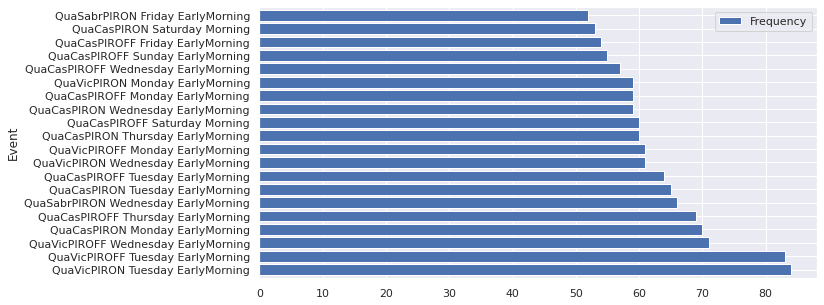

In [ ]:
cluster(0,'kmode')

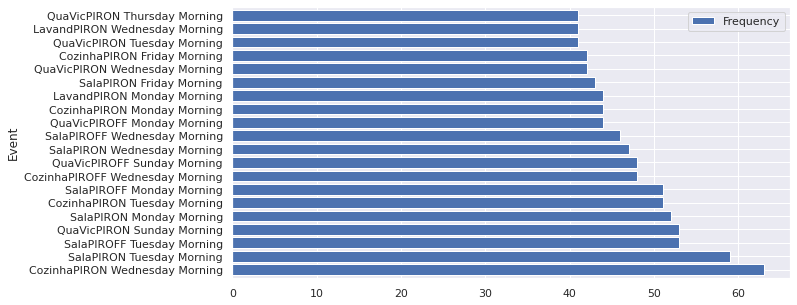

In [ ]:
cluster(1,'kmode')

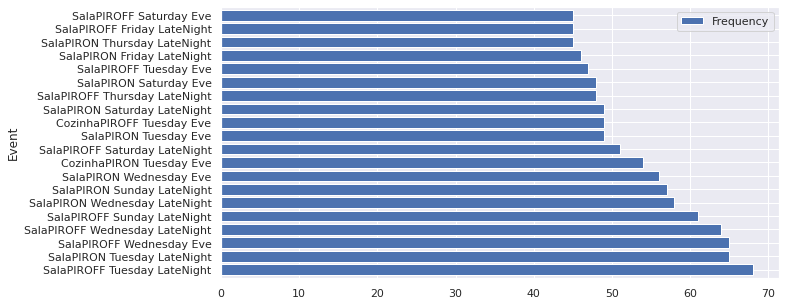

In [ ]:
cluster(2,'kmode')

Em geral, observamos que os dados agrupados mais frequentes nos clusters do kmeans possuem o mesmo período do dia, ou pelo menos períodos próximos.

Também é possível observar os eventos mais frequentes em cada cluster do K Means:

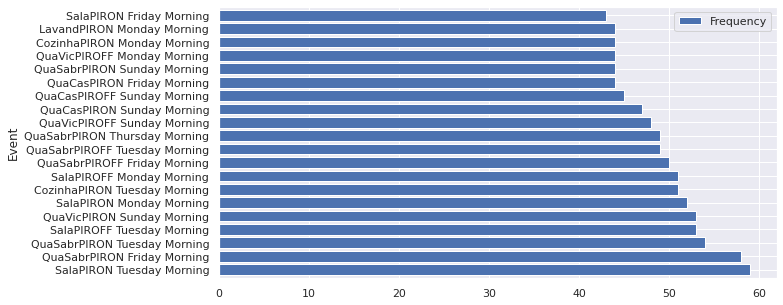

In [ ]:
cluster(0,'kmean')

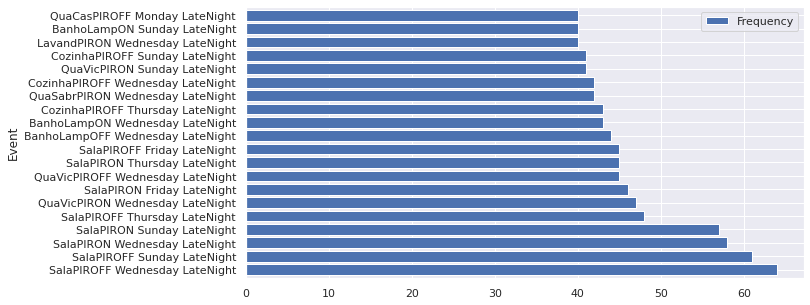

In [ ]:
cluster(1,'kmean')

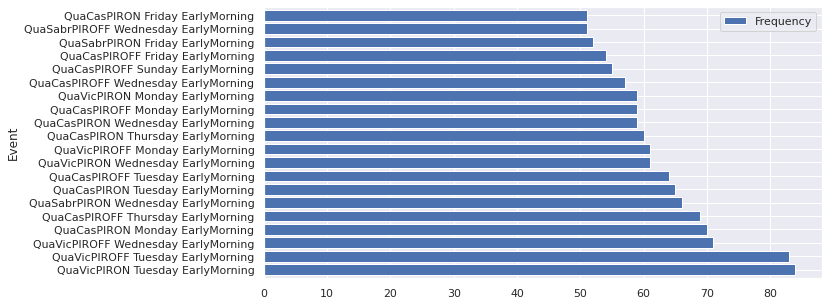

In [ ]:
cluster(2,'kmean')

Em geral, temos uma concordância um pouco maior no K Means entre o período do dia dos eventos mais frequentes nos clusters, quando comparado a alguns clusters do  Modes.

Observado o gráfico abaixo da série temporal com os dados rotulados com o K Means, nao podemos obeservar qualquer periodicidade, o que seria algo **desejável para aprendizado de atividade diária**.

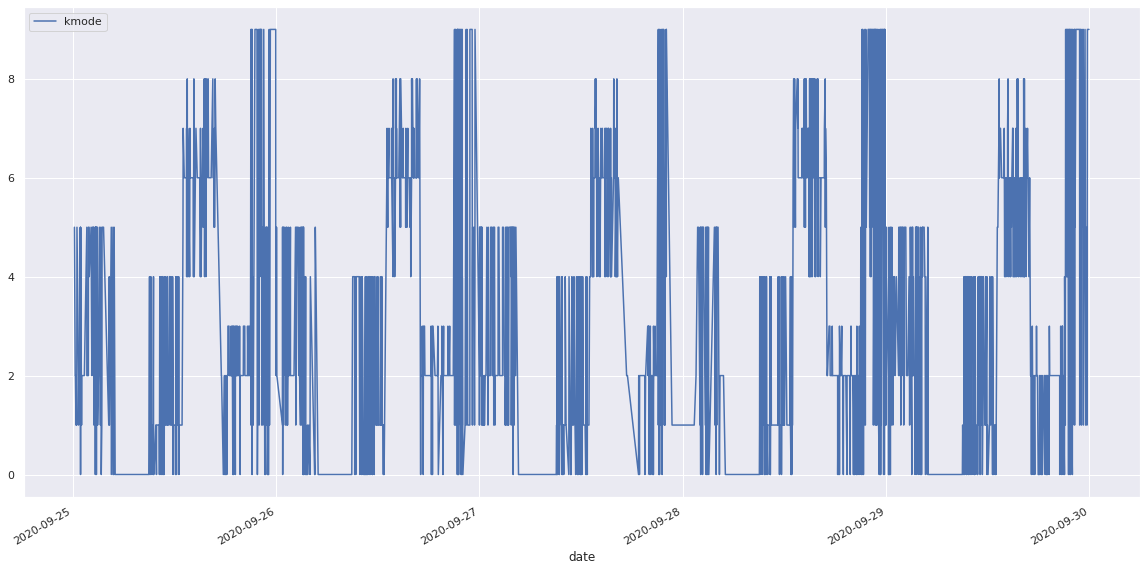

In [ ]:
df['date'] = pd.to_datetime(df['unix_ts'],unit='s')

df3 = df[1600992503 < df.unix_ts]

df3 = df3[df3.unix_ts < 1601424031]

df3 = df3.set_index('date')

df3 = df3.drop(columns=['hour','dayPeriod','weekDay','full_event','unix_ts','room','event'])

df3.plot(figsize=(20,10))

Já a visualização de alguns dias da série de dados rotulada com o K Means apresenta alguma periodicidade:

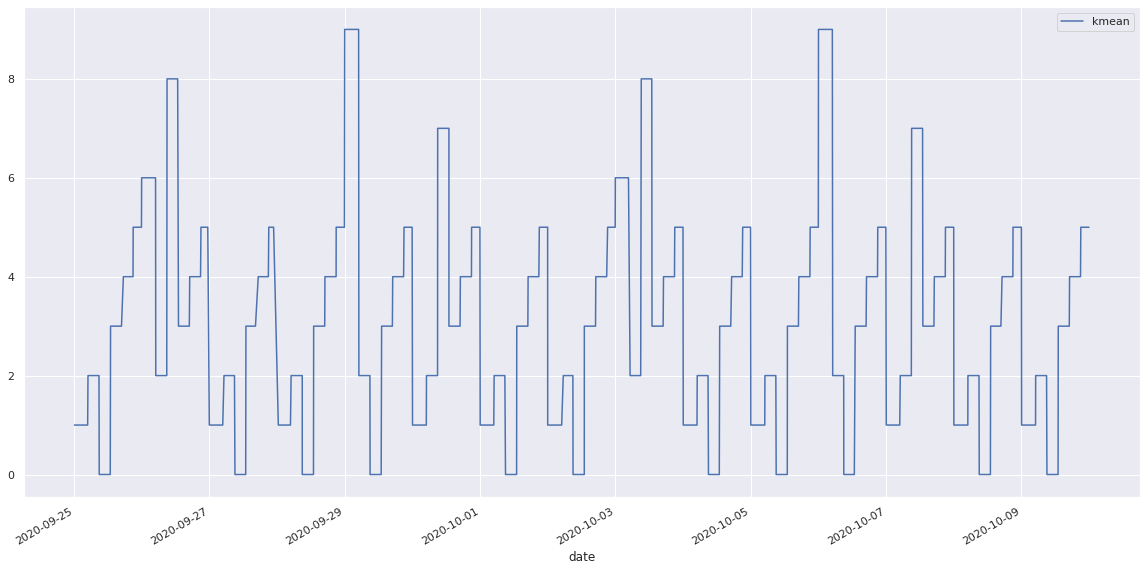

In [ ]:
df['date'] = pd.to_datetime(df['unix_ts'],unit='s')

df3 = df[1600992503 < df.unix_ts]

df3 = df3[df3.unix_ts < 1602288095]

df3 = df3.set_index('date')

df3 = df3.drop(columns=['hour','dayPeriod','weekDay','full_event','unix_ts','room','event','kmode'])

df3.plot(figsize=(20,10))

Desta forma, optamos pelos dados rotulados pelo modelo K-Means.

## 5. InterSCity

Nesta etapa, os dados rotulados são enviados à plataforma [InterSCity](https://interscity.org/), através de API disponível.

**Referência**:

BATISTA, Daniel Macêdo et al. Interscity: Addressing future internet research challenges for smart cities. In: **2016 7th International Conference on the Network of the Future (NOF)**. IEEE, 2016. p. 1-6.

### 5.1. Setup

In [ ]:
!pip install requests

In [ ]:
import requests
import json

Referência: https://colab.research.google.com/drive/1xCmWAMgn5iC3_STBF723kzqm0ev_tn2q

Dados de uma casa conectada agrupados com algoritmo K Means.

In [ ]:
df['date'] = pd.to_datetime(df['unix_ts'],unit='s')

df4 = df.drop(columns=['hour','dayPeriod','weekDay','full_event','unix_ts','kmode','event','room'])

df4

date  kmean
4   2020-09-22 00:08:43      9
5   2020-09-22 00:10:47      9
6   2020-09-22 00:19:01      9
7   2020-09-22 00:24:03      9
8   2020-09-22 00:38:20      9
..                  ...    ...
798 2020-10-21 23:56:41      5
800 2020-10-21 23:57:36      5
801 2020-10-21 23:58:34      5
802 2020-10-21 23:58:47      5
803 2020-10-21 23:58:52      5

[17364 rows x 2 columns]

In [ ]:
dates = df4.date.tolist()

dates[0]

Timestamp('2020-09-22 00:08:43')

In [ ]:
values = df4.kmean.tolist()

values[0]

9

Configurações iniciais para uso da API do InterSCity:

In [ ]:
# Endereço para a api
api = 'http://api.playground.interscity.org'

Criação de capability de um sensor inteligente com atividade diária:

In [ ]:
# Cria uma 'capability'

# Playground - Resource Catalog - Post - Catalog capabilities

capability_json = {
  "name": "ativ_casa",
  "description": "Dados de uma casa conectada agrupados com algoritmo K Means",
  "capability_type": "sensor"
}
r = requests.post(api+'/catalog/capabilities/', json=capability_json)
if(r.status_code == 201):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "capability_type": "sensor",
  "description": "Dados de uma casa conectada agrupados com algoritmo K Means",
  "id": 1201,
  "name": "ativ_casa"
}


In [ ]:
# Exibe as 'capabilities'

# Playground - Resource Catalog - Get - Catalog capabilities

r = requests.get(api+'/catalog/capabilities')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "capabilities": [
    {
      "description": "Mede a tensao utilizando em Voltes",
      "function": 0,
      "id": 1037,
      "name": "tensao2_Smarmita"
    },
    {
      "description": "Measure the temperature of the environment",
      "function": 0,
      "id": 969,
      "name": "temperature2"
    },
    {
      "description": "Mede a temperatura do ambiente",
      "function": 0,
      "id": 971,
      "name": "temperatura 2"
    },
    {
      "description": "Mede a temperatura do ambiente em graus Celsius",
      "function": 0,
      "id": 970,
      "name": "temperatura"
    },
    {
      "description": "Mede a Energia Ativa Total em Watts",
      "function": 0,
      "id": 1038,
      "name": "EAtivaTotal"
    },
    {
      "description": "Measure the temperature of the environment",
      "function": 0,
      "id": 972,
      "name": "temperature3"
    },
    {
      "description": "Measure the temperature of the environment",
      "function": 0,
      "id": 973,
  

Criação de um resource de casa conectada:

In [ ]:
# Cria um 'resource'

# Playground - Resource Catalog - Post - Catalog resource

resource_json = {
  "data": {
    "description": "Casa Conectada",
    "capabilities": [
      "ativ_casa"
    ],
    "status": "active",
    "lat": -23.6665574,
    "lon": -46.5100398
  }
}
r = requests.post(api+'/catalog/resources', json=resource_json)
uuid = ''
if(r.status_code == 201):
  resource = json.loads(r.text)
  uuid = resource['data']['uuid']
  print(json.dumps(resource, indent=2))
else:
  print('Status code: '+str(r.status_code))

{
  "data": {
    "id": 1210,
    "uri": null,
    "created_at": "2020-11-18T18:40:03.701Z",
    "updated_at": "2020-11-18T18:40:03.701Z",
    "lat": -23.6665574,
    "lon": -46.5100398,
    "status": "active",
    "collect_interval": null,
    "description": "Casa Conectada",
    "uuid": "77b32027-97ac-4dac-9a92-90c45aca635c",
    "city": null,
    "neighborhood": null,
    "state": null,
    "postal_code": null,
    "country": null,
    "capabilities": [
      "ativ_casa"
    ]
  }
}


In [ ]:
# Exibe os 'resources'

# Playground - Resource Catalog - Get - Catalog resource

r = requests.get(api+'/catalog/resources')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "resources": [
    {
      "capabilities": [
        "ativ_casa"
      ],
      "city": null,
      "collect_interval": null,
      "country": null,
      "created_at": "2020-11-18T18:40:03.701Z",
      "description": "Casa Conectada",
      "id": 1210,
      "lat": -23.6665574,
      "lon": -46.5100398,
      "neighborhood": null,
      "postal_code": null,
      "state": null,
      "status": "active",
      "updated_at": "2020-11-18T18:40:03.701Z",
      "uri": null,
      "uuid": "77b32027-97ac-4dac-9a92-90c45aca635c"
    },
    {
      "capabilities": [
        "temperatura"
      ],
      "city": null,
      "collect_interval": null,
      "country": null,
      "created_at": "2020-11-17T00:53:27.401Z",
      "description": "Onibus publico",
      "id": 1209,
      "lat": -23.559616,
      "lon": -46.731386,
      "neighborhood": null,
      "postal_code": null,
      "state": null,
      "status": "active",
      "updated_at": "2020-11-17T00:53:27.401Z",
      "uri": null,
 

### 5.2. Adicionar Dados

Teste inicial com dois dados:

In [ ]:
# Adiciona dado da 'capability' ao 'resource'

# Playground - Resource Adaptor - Post - Adaptor resources

capability_data_json = {
  "data": [
    {
      "ativ_casa": values[0],
      "timestamp": dates[0].isoformat()
    },
    {
      "ativ_casa": values[1],
      "timestamp": dates[1].isoformat()
    }
  ]
}
r = requests.post(api+'/adaptor/resources/'+uuid+'/data/environment_monitoring', json=capability_data_json)
if(r.status_code == 201):
  print('Ok')
else:
  print('Status code: '+str(r.status_code))

Ok


Resultado após teste inicial com dois dados:

In [ ]:
# Exibe dados do 'resource'

# Playground - Data collector - Post - Resources data

r = requests.post(api+'/collector/resources/'+uuid+'/data')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "resources": [
    {
      "capabilities": {
        "environment_monitoring": [
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:08:43.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:10:47.000Z"
          }
        ]
      },
      "uuid": "77b32027-97ac-4dac-9a92-90c45aca635c"
    }
  ]
}


Após o teste inicial com dois dados, fazemos o envio da série de dados rotulados completa através da API do InterSCity.

In [ ]:
#https://stackoverflow.com/questions/25348640/two-lists-to-json-format-in-python

[{'ativ_casa': value, 'timestamp': date.isoformat()} for value, date in zip(values, dates)]

[{'ativ_casa': 9, 'timestamp': '2020-09-22T00:08:43'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:10:47'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:19:01'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:24:03'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:38:20'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:38:51'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:40:30'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:43:21'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:43:22'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:43:31'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:48:54'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T00:50:55'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:01:01'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:03:41'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:06:03'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:07:43'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:12:51'},
 {'ativ_casa': 9, 'timestamp': '2020-09-22T01:19:06'},
 {'ativ_ca

In [ ]:
# Adiciona dado da 'capability' ao 'resource'

# Playground - Resource Adaptor - Post - Adaptor resources

capability_data_json = {
  "data": [{'ativ_casa': value, 'timestamp': date.isoformat()} for value, date in zip(values, dates)]
}
r = requests.post(api+'/adaptor/resources/'+uuid+'/data/environment_monitoring', json=capability_data_json)
if(r.status_code == 201):
  print('Ok')
else:
  print('Status code: '+str(r.status_code))

Ok


Resultado com a série completa:

In [ ]:
# Exibe dados do 'resource'

# Playground - Data collector - Post - Resources data

r = requests.post(api+'/collector/resources/'+uuid+'/data')
if(r.status_code == 200):
  content = json.loads(r.text)
  print(json.dumps(content, indent=2, sort_keys=True))
else:
  print('Status code: '+str(r.status_code))

{
  "resources": [
    {
      "capabilities": {
        "environment_monitoring": [
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:08:43.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:10:47.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:08:43.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:19:01.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:10:47.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:38:20.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:38:51.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:24:03.000Z"
          },
          {
            "ativ_casa": 9,
            "date": "2020-09-22T00:43:22.000Z"
          },
          {
   

## 6. Conclusão

### 6.1. Considerações Finais

* A partir de dados reais coletados (22 de setembro de 2020 a 21 de outubro de 2020) em testbed de casa conectada na região do ABC, foi possível realizar o **pré-processamento, agrupamento de dados com algoritmos de aprendizado não-supervisionado, e integração destes dados agrupados com a API da InterSCity**;
* Todos os dados e código estão disponíveis no **GitHub**: https://github.com/vthayashi/smarthome;
* O pré-processamento integrou **One-Hot Encoding**, preparação de parâmetros de **dia da semana** e **período do dia**, e consideração apenas dos **eventos mais frequentes** (que ocorreram pelo menos 800 vezes na série completa);
* O algoritmo **K Means** obteve melhor resultado que o algoritmo K Modes para esta tarefa de agrupamento de eventos de movimentação e estado da iluminação da casa conectada.



### 6.2. Trabalhos Futuros

*   Incluir eventos de energia a partir de dados coletados de [smart meter](https://github.com/vthayashi/smarthome/tree/main/smartmeter) para aprendizado de atividade diária
*   Fazer análise com dados de longo prazo e avaliar viabilidade de **autenticação continuada**